In [1]:
import time, sys

# Import the Qiskit 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QiskitError
from qiskit import execute, IBMQ, BasicAer, transpiler, Aer
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.mapper import Layout

import numpy as np
import qiskit

# Define your backend

In [2]:
from qiskit import IBMQ

# insert your token & URL here
IBMQ.enable_account('<token>',
                    url='<url>')

# check available backends
print("Available backends:")
IBMQ.backends()

Remote backend "ibmqx_qasm_simulator" could not be instantiated due to an invalid config: {'memory': ['Missing data for required field.'], 'open_pulse': ['Missing data for required field.'], 'local': ['Missing data for required field.'], 'basis_gates': ['Missing data for required field.'], 'n_qubits': ['Missing data for required field.'], 'backend_name': ['Missing data for required field.'], 'max_shots': ['Missing data for required field.'], 'conditional': ['Missing data for required field.'], 'backend_version': ['Missing data for required field.'], 'gates': {0: {'qasm_def': ['Missing data for required field.'], 'name': ['Missing data for required field.'], 'parameters': ['Missing data for required field.']}}}


Available backends:


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q-ornl, bes-qis, argonne)>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-ornl, bes-qis, argonne)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-ornl, bes-qis, argonne)>]

# Define the layout

In [3]:
# execute on the IBM Tokyo 20 Qubit Machine
#backend = IBMQ.get_backend('ibmq_qasm_simulator')
backend = IBMQ.get_backend('ibmq_20_tokyo')
print(backend)
backend.status()

ibmq_20_tokyo


BackendStatus(backend_name='ibmq_20_tokyo', backend_version='1.2.6', operational=True, pending_jobs=0, status_msg='active')

# Define the UCCSD ansatz circuit

In [4]:
def get_ucc_ansatz(theta):
    circuit = QuantumCircuit(2, 2)
    circuit.x(0)
    circuit.ry(theta, 1)
    circuit.cx(1, 0)
    return circuit

# Define the naive measurement circuits

In [5]:
shots1 = 1000

def measure_zi_simple(theta, ZI_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    ZI_job_IDs.append(job.job_id())
    
def measure_iz_simple(theta, IZ_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    IZ_job_IDs.append(job.job_id())
    
def measure_xx_simple(theta, XX_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.h(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    XX_job_IDs.append(job.job_id())

def measure_yy_simple(theta, YY_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.h(0)
    circuit.sdg(0)
    circuit.h(1)
    circuit.sdg(1)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots1)
    print(job.job_id())
    YY_job_IDs.append(job.job_id())

def measure_hamiltonian_simple(theta, ZI_job_IDs, IZ_job_IDs, XX_job_IDs, YY_job_IDs):
    measure_zi_simple(theta, ZI_job_IDs)
    measure_iz_simple(theta, IZ_job_IDs)
    measure_xx_simple(theta, XX_job_IDs)
    measure_yy_simple(theta, YY_job_IDs)

# Define the simultaneous measurement circuits

In [6]:
shots2 = 2000

def measure_zi_and_iz(theta, ZI_and_IZ_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots2)
    print(job.job_id())
    ZI_and_IZ_job_IDs.append(job.job_id())
    
def measure_xx_and_yy(theta, XX_and_YY_job_IDs):
    circuit = get_ucc_ansatz(theta)
    circuit.cx(0, 1)
    circuit.h(0)
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    job = qiskit.execute(circuit, backend=backend, shots=shots2)
    print(job.job_id())
    XX_and_YY_job_IDs.append(job.job_id())

def measure_simultaneously_hamiltonian_simple(theta, ZI_and_IZ_job_IDs, XX_and_YY_job_IDs):
    measure_zi_and_iz(theta, ZI_and_IZ_job_IDs)
    measure_xx_and_yy(theta, XX_and_YY_job_IDs)

# Submit the job to Qiskit and get the job IDs

In [7]:
import numpy as np
import qiskit

ZI_job_IDs = []
IZ_job_IDs = []
XX_job_IDs = []
YY_job_IDs = []

ZI_and_IZ_job_IDs = []
XX_and_YY_job_IDs = []

theta_values = []

for theta in np.arange(-np.pi, np.pi, np.pi / 12):
    print(theta)
    measure_hamiltonian_simple(theta, ZI_job_IDs, IZ_job_IDs, XX_job_IDs, YY_job_IDs)
    measure_simultaneously_hamiltonian_simple(theta, ZI_and_IZ_job_IDs, XX_and_YY_job_IDs)
    theta_values.append(theta)
print('Done!')

-3.141592653589793
5d3cb9064610b6001873ff28
5d3cb9106c947600181bb431
5d3cb9185e9f6500181e752d
5d3cb9235e9f6500181e752f
5d3cb92b6c947600181bb433
5d3cb932b61d040018076b59
-2.8797932657906435
5d3cb9385e9f6500181e7531
5d3cb9415e9f6500181e7533
5d3cb94a9bb742001ac32daf
5d3cb953b61d040018076b5b
5d3cb95bb411ea00186e46eb
5d3cb9655e9f6500181e7535
-2.617993877991494
5d3cb96fa06411001849a903
5d3cb9779bb742001ac32db1
5d3cb97f6c947600181bb435
5d3cb9884610b6001873ff2a
5d3cb991b61d040018076b5d
5d3cb99bf22d1200183f9f45
-2.3561944901923444
5d3cb9a39bb742001ac32db3
5d3cb9ac6c947600181bb437
5d3cb9b45e9f6500181e7537
5d3cb9beb411ea00186e46ed
5d3cb9c8f22d1200183f9f47
5d3cb9cf9bb742001ac32db5
-2.094395102393195
5d3cb9d9fb29900018d5fb0c
5d3cb9e1b411ea00186e46ef
5d3cb9eaf22d1200183f9f49
5d3cb9f04610b6001873ff2c
5d3cb9fb9bb742001ac32db7
5d3cba04f22d1200183f9f4b
-1.8325957145940452
5d3cba0cb61d040018076b5f
5d3cba159bb742001ac32db9
5d3cba1fa06411001849a905
5d3cba26b411ea00186e46f1
5d3cba305e9f6500181e7539
5d3cba39

# push job IDs to list for easier processing
you will need to do this before closing the computer to make your life easier later on :)

In [8]:
print('ZI_job_IDs = ')
print(ZI_job_IDs)
print()

print('IZ_job_IDs = ')
print(IZ_job_IDs)
print()

print('XX_job_IDs = ')
print(XX_job_IDs)
print()

print('YY_job_IDs = ')
print(YY_job_IDs)
print()

print('ZI_and_IZ_job_IDs = ')
print(ZI_and_IZ_job_IDs)
print()

print('XX_and_YY_job_IDs = ')
print(XX_and_YY_job_IDs)
print()

print('theta_values = ')
print(theta_values)

ZI_job_IDs = 
['5d3cb9064610b6001873ff28', '5d3cb9385e9f6500181e7531', '5d3cb96fa06411001849a903', '5d3cb9a39bb742001ac32db3', '5d3cb9d9fb29900018d5fb0c', '5d3cba0cb61d040018076b5f', '5d3cba3e5e9f6500181e753b', '5d3cba6efb29900018d5fb10', '5d3cba9cf22d1200183f9f4f', '5d3cbad4f8ffa90019ad2c6a', '5d3cbb034610b6001873ff2e', '5d3cbb31f22d1200183f9f51', '5d3cbb61f22d1200183f9f53', '5d3cbb90a06411001849a913', '5d3cbbc5a06411001849a917', '5d3cbbfca06411001849a919', '5d3cbc264610b6001873ff32', '5d3cbc549bb742001ac32dbd', '5d3cbc84b411ea00186e470f', '5d3cbcb24610b6001873ff38', '5d3cbcd55e9f6500181e7555', '5d3cbcfdf8ffa90019ad2c7c', '5d3cbd229bb742001ac32dc1', '5d3cbd45f8ffa90019ad2c80']

IZ_job_IDs = 
['5d3cb9106c947600181bb431', '5d3cb9415e9f6500181e7533', '5d3cb9779bb742001ac32db1', '5d3cb9ac6c947600181bb437', '5d3cb9e1b411ea00186e46ef', '5d3cba159bb742001ac32db9', '5d3cba46a06411001849a907', '5d3cba74b61d040018076b63', '5d3cbaa56c947600181bb439', '5d3cbadaf8ffa90019ad2c6c', '5d3cbb0b6c947600

### (Check the status of the specific job)

In [5]:
backend.retrieve_job('5d3cbd649bb742001ac32dc5').status()

<JobStatus.DONE: 'job has successfully run'>

# Retyping the job IDs
just copy and paste from the print statement results in the previous block

In [5]:
ZI_job_IDs = ['5d3cb9064610b6001873ff28', '5d3cb9385e9f6500181e7531', '5d3cb96fa06411001849a903', '5d3cb9a39bb742001ac32db3', '5d3cb9d9fb29900018d5fb0c', '5d3cba0cb61d040018076b5f', '5d3cba3e5e9f6500181e753b', '5d3cba6efb29900018d5fb10', '5d3cba9cf22d1200183f9f4f', '5d3cbad4f8ffa90019ad2c6a', '5d3cbb034610b6001873ff2e', '5d3cbb31f22d1200183f9f51', '5d3cbb61f22d1200183f9f53', '5d3cbb90a06411001849a913', '5d3cbbc5a06411001849a917', '5d3cbbfca06411001849a919', '5d3cbc264610b6001873ff32', '5d3cbc549bb742001ac32dbd', '5d3cbc84b411ea00186e470f', '5d3cbcb24610b6001873ff38', '5d3cbcd55e9f6500181e7555', '5d3cbcfdf8ffa90019ad2c7c', '5d3cbd229bb742001ac32dc1', '5d3cbd45f8ffa90019ad2c80']
IZ_job_IDs = ['5d3cb9106c947600181bb431', '5d3cb9415e9f6500181e7533', '5d3cb9779bb742001ac32db1', '5d3cb9ac6c947600181bb437', '5d3cb9e1b411ea00186e46ef', '5d3cba159bb742001ac32db9', '5d3cba46a06411001849a907', '5d3cba74b61d040018076b63', '5d3cbaa56c947600181bb439', '5d3cbadaf8ffa90019ad2c6c', '5d3cbb0b6c947600181bb43b', '5d3cbb38f8ffa90019ad2c70', '5d3cbb695e9f6500181e7547', '5d3cbb99b411ea00186e4701', '5d3cbbcb5e9f6500181e754b', '5d3cbc03b411ea00186e4707', '5d3cbc2e6c947600181bb443', '5d3cbc5d9bb742001ac32dbf', '5d3cbc8da06411001849a91b', '5d3cbcb7f8ffa90019ad2c78', '5d3cbcdc5e9f6500181e7557', '5d3cbd03f8ffa90019ad2c7e', '5d3cbd274610b6001873ff3a', '5d3cbd4afb29900018d5fb1c']
XX_job_IDs = ['5d3cb9185e9f6500181e752d', '5d3cb94a9bb742001ac32daf', '5d3cb97f6c947600181bb435', '5d3cb9b45e9f6500181e7537', '5d3cb9eaf22d1200183f9f49', '5d3cba1fa06411001849a905', '5d3cba4e5e9f6500181e753d', '5d3cba7bf22d1200183f9f4d', '5d3cbaaea06411001849a90b', '5d3cbae1fb29900018d5fb12', '5d3cbb13f8ffa90019ad2c6e', '5d3cbb425e9f6500181e7545', '5d3cbb71a06411001849a911', '5d3cbba35e9f6500181e7549', '5d3cbbd6f22d1200183f9f55', '5d3cbc09f8ffa90019ad2c74', '5d3cbc33fb29900018d5fb16', '5d3cbc655e9f6500181e7551', '5d3cbc97fb29900018d5fb18', '5d3cbcbcf8ffa90019ad2c7a', '5d3cbce3a06411001849a921', '5d3cbd09b61d040018076b71', '5d3cbd2db411ea00186e4711', '5d3cbd4f5e9f6500181e755d']
YY_job_IDs = ['5d3cb9235e9f6500181e752f', '5d3cb953b61d040018076b5b', '5d3cb9884610b6001873ff2a', '5d3cb9beb411ea00186e46ed', '5d3cb9f04610b6001873ff2c', '5d3cba26b411ea00186e46f1', '5d3cba55fb29900018d5fb0e', '5d3cba86b411ea00186e46f5', '5d3cbab95e9f6500181e753f', '5d3cbaeaa06411001849a90d', '5d3cbb195e9f6500181e7543', '5d3cbb4ab61d040018076b69', '5d3cbb79b411ea00186e46fd', '5d3cbbada06411001849a915', '5d3cbbdeb411ea00186e4705', '5d3cbc125e9f6500181e754d', '5d3cbc3df8ffa90019ad2c76', '5d3cbc6fb411ea00186e470d', '5d3cbc9eb61d040018076b6b', '5d3cbcc3a06411001849a91d', '5d3cbcebf22d1200183f9f57', '5d3cbd11f22d1200183f9f59', '5d3cbd324610b6001873ff3c', '5d3cbd55fb29900018d5fb1e']
ZI_and_IZ_job_IDs = ['5d3cb92b6c947600181bb433', '5d3cb95bb411ea00186e46eb', '5d3cb991b61d040018076b5d', '5d3cb9c8f22d1200183f9f47', '5d3cb9fb9bb742001ac32db7', '5d3cba305e9f6500181e7539', '5d3cba5ca06411001849a909', '5d3cba8db411ea00186e46f7', '5d3cbac2b61d040018076b65', '5d3cbaf0fb29900018d5fb14', '5d3cbb206c947600181bb43d', '5d3cbb52a06411001849a90f', '5d3cbb824610b6001873ff30', '5d3cbbb59bb742001ac32dbb', '5d3cbbe86c947600181bb441', '5d3cbc19b411ea00186e4709', '5d3cbc444610b6001873ff34', '5d3cbc784610b6001873ff36', '5d3cbca95e9f6500181e7553', '5d3cbccafb29900018d5fb1a', '5d3cbcf15e9f6500181e7559', '5d3cbd17a06411001849a923', '5d3cbd3a9bb742001ac32dc3', '5d3cbd5dfb29900018d5fb20']
XX_and_YY_job_IDs = ['5d3cb932b61d040018076b59', '5d3cb9655e9f6500181e7535', '5d3cb99bf22d1200183f9f45', '5d3cb9cf9bb742001ac32db5', '5d3cba04f22d1200183f9f4b', '5d3cba39b411ea00186e46f3', '5d3cba64b61d040018076b61', '5d3cba96b411ea00186e46f9', '5d3cbacd5e9f6500181e7541', '5d3cbaf7b411ea00186e46fb', '5d3cbb29b61d040018076b67', '5d3cbb586c947600181bb43f', '5d3cbb88b411ea00186e46ff', '5d3cbbbcb411ea00186e4703', '5d3cbbf2f8ffa90019ad2c72', '5d3cbc205e9f6500181e754f', '5d3cbc4eb411ea00186e470b', '5d3cbc7d6c947600181bb445', '5d3cbcadb61d040018076b6d', '5d3cbcd0a06411001849a91f', '5d3cbcf7b61d040018076b6f', '5d3cbd1d5e9f6500181e755b', '5d3cbd3fb61d040018076b73', '5d3cbd649bb742001ac32dc5']
theta_values = [-3.141592653589793, -2.8797932657906435, -2.617993877991494, -2.3561944901923444, -2.094395102393195, -1.8325957145940452, -1.5707963267948957, -1.308996938995746, -1.0471975511965965, -0.785398163397447, -0.5235987755982974, -0.2617993877991478, 1.7763568394002505e-15, 0.26179938779915135, 0.5235987755983009, 0.7853981633974505, 1.0471975511966, 1.3089969389957492, 1.5707963267948992, 1.8325957145940492, 2.0943951023931984, 2.3561944901923475, 2.6179938779914975, 2.8797932657906475]

# Retrieve the job results

### compute the energy sums for naive measurement

In [7]:
#backend = IBMQ.get_backend('')
shots1 = 1000
final_result_naive = []
for i in range (len(theta_values)):
    
    zi_counts = backend.retrieve_job(ZI_job_IDs[i]).result().get_counts()
    zi_contribution = (zi_counts.get('00', 0) + zi_counts.get('10', 0) 
                       - zi_counts.get('11', 0) - zi_counts.get('01', 0)) / shots1
    #print(zi_counts)
    #print(zi_counts.get('10', 0))
    #print(zi_contribution)
    
    iz_counts = backend.retrieve_job(IZ_job_IDs[i]).result().get_counts()
    iz_contribution = (iz_counts.get('00', 0) + iz_counts.get('01', 0) 
                       - iz_counts.get('10', 0) - iz_counts.get('11', 0)) / shots1
    
    xx_counts = backend.retrieve_job(XX_job_IDs[i]).result().get_counts()
    xx_contribution = (xx_counts.get('00', 0) + xx_counts.get('11', 0) 
                       - xx_counts.get('01', 0) - xx_counts.get('10', 0)) / shots1
    
    yy_counts = backend.retrieve_job(YY_job_IDs[i]).result().get_counts()
    yy_contribution = (yy_counts.get('00', 0) + yy_counts.get('11', 0) 
                       - yy_counts.get('01', 0) - yy_counts.get('10', 0)) / shots1
    
    total = 5.9 + .22 * zi_contribution - 6.1 * iz_contribution - 2.14 * xx_contribution - 2.14 * yy_contribution
    final_result_naive.append(total)
    print(total)

10.807200000000002
11.607560000000001
11.78512
11.89976
11.0054
10.05568
8.39736
7.227200000000002
5.69628
3.4002000000000003
2.2773600000000007
0.82712
-0.2978399999999991
-0.8495200000000002
-1.2616399999999992
-0.7684399999999993
-0.17743999999999915
0.6048800000000005
1.8539600000000012
3.68084
5.359360000000001
6.9428399999999995
8.50416
9.897359999999999


In [1]:
final_result_naive = [10.807200000000002,11.607560000000001,11.78512,11.89976,11.0054,10.05568,8.39736,7.227200000000002,5.69628,3.4002000000000003,2.2773600000000007,0.82712,-0.2978399999999991,-0.8495200000000002,-1.2616399999999992,-0.7684399999999993,-0.17743999999999915,0.6048800000000005,1.8539600000000012,3.68084,5.359360000000001,6.9428399999999995,8.50416,9.897359999999999]

### compute the energy sums for simultaneous measurement

In [8]:
#backend = IBMQ.get_backend('ibmq_qasm_simulator')
shots2 = 2000

final_result_simultaneous = []
for i in range (len(theta_values)):
    zi_and_iz_counts = backend.retrieve_job(ZI_and_IZ_job_IDs[i]).result().get_counts()
    zi_contribution = (zi_and_iz_counts.get('00', 0) + zi_and_iz_counts.get('10', 0) 
                       - zi_and_iz_counts.get('11', 0) - zi_and_iz_counts.get('01', 0)) / shots2
    iz_contribution = (zi_and_iz_counts.get('00', 0) + zi_and_iz_counts.get('01', 0) 
                       - zi_and_iz_counts.get('10', 0) - zi_and_iz_counts.get('11', 0)) / shots2
    #print(zi_and_iz_counts)
    xx_and_yy_counts = backend.retrieve_job(XX_and_YY_job_IDs[i]).result().get_counts()
    xx_contribution = (xx_and_yy_counts.get('00', 0) + xx_and_yy_counts.get('10', 0) 
                       - xx_and_yy_counts.get('11', 0) - xx_and_yy_counts.get('01', 0)) / shots2
    zz_contribution = (xx_and_yy_counts.get('00', 0) + xx_and_yy_counts.get('01', 0) 
                       - xx_and_yy_counts.get('10', 0) - xx_and_yy_counts.get('11', 0)) / shots2
    yy_contribution = -xx_contribution * zz_contribution
    total = 5.9 + .22 * zi_contribution - 6.1 * iz_contribution - 2.14 * xx_contribution - 2.14 * yy_contribution
    final_result_simultaneous.append(total)
    print(total)

10.7013296
11.393508
11.37970392
11.60096976
10.944376659999998
9.720569440000002
8.432333900000001
7.174680800000001
5.3512792
3.486390800000001
2.154184780000001
0.8099097000000004
-0.2586061799999995
-0.8986360000000001
-1.1858053199999992
-0.9109557399999995
-0.3971209999999996
0.31902728000000025
2.0504440200000005
3.097132
5.620603280000001
6.9206620999999995
8.4203664
10.00763702


In [2]:
final_result_simultaneous = [10.7013296,11.393508,11.37970392,11.60096976,10.944376659999998,9.720569440000002,8.432333900000001,7.174680800000001,5.3512792,3.486390800000001,2.154184780000001,0.8099097000000004,-0.2586061799999995,-0.8986360000000001,-1.1858053199999992,-0.9109557399999995,-0.3971209999999996,0.31902728000000025,2.0504440200000005,3.097132,5.620603280000001,6.9206620999999995,8.4203664,10.00763702]

In [3]:
values_theory = [12.191751999999997, 13.15524, 13.462224, 13.381992, 12.837567999999997, 11.637923999999998, 10.217920000000001, 8.380472000000001, 6.38668, 4.4392, 2.5525520000000013, 0.8814480000000007, -0.42213999999999907, -1.3090319999999995, -1.7176839999999993, -1.5886079999999994, -0.9050319999999998, 0.2661680000000004, 1.5365760000000002, 3.4022159999999992, 5.413296000000001, 7.372232, 9.278692, 10.918935999999999]

# Superimpose naive vs. simultaneous results

In [16]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

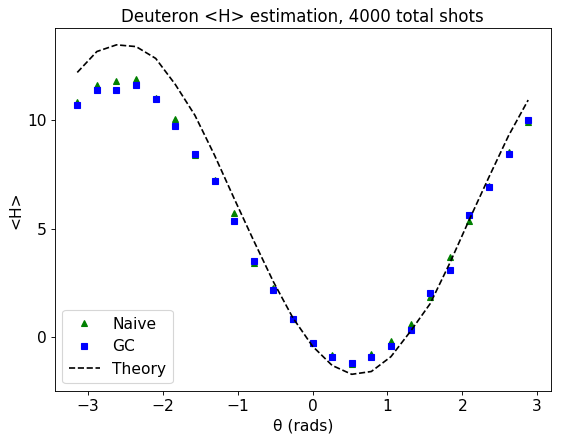

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(theta_values, final_result_naive, 'g^', label = "Naive")
plt.plot(theta_values, final_result_simultaneous, 'bs', label = "GC")
plt.plot(theta_values, values_theory, 'k--', label = "Theory")
plt.legend(loc='best')
plt.xlabel('θ (rads)')
plt.ylabel('<H>')
plt.title('Deuteron <H> estimation, 4000 total shots')
matplotlib.pyplot.locator_params(axis='y', nbins=6)
plt.show()
plt.savefig("Deuteron_results_4000.svg")

# Compute and plot the difference from theory (many shots running on simulator)

In [19]:
values_theory = [12.191751999999997, 13.15524, 13.462224, 13.381992, 12.837567999999997, 11.637923999999998, 10.217920000000001, 8.380472000000001, 6.38668, 4.4392, 2.5525520000000013, 0.8814480000000007, -0.42213999999999907, -1.3090319999999995, -1.7176839999999993, -1.5886079999999994, -0.9050319999999998, 0.2661680000000004, 1.5365760000000002, 3.4022159999999992, 5.413296000000001, 7.372232, 9.278692, 10.918935999999999]
value_diff, value2_diff = [], []
for theta in range(len(theta_values)):
    value_diff.append(abs(final_result_naive[theta] - values_theory[theta]))
    value2_diff.append(abs(final_result_simultaneous[theta] - values_theory[theta]))

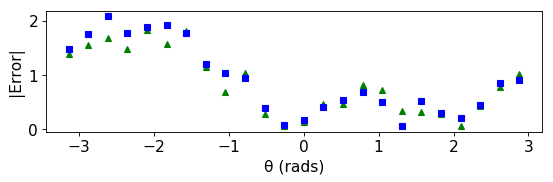

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(theta_values, value_diff, 'g^', label = "Naive")
plt.plot(theta_values, value2_diff, 'bs', label = "GC")
plt.xlabel('θ (rads)')
plt.ylabel('|Error|')
plt.show()
plt.savefig("Deuteron_error_4000.svg")

In [19]:
len(['hi' for v1, v2 in zip(value_diff, value2_diff) if v1 > v2])

7

In [14]:
print(sum(value_diff))

20.340503999999992


In [15]:
print(sum(value2_diff))

21.96742025999999
